In [1]:
#ECE225A Project, inference task
#Ziming Liu
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('dataset/ETHUSD_1m_Binance.csv')

# Convert the 'Open time' column to datetime format
df['Open time'] = pd.to_datetime(df['Open time'])

# Filter the DataFrame to only include data from 2023-03-24 14:00:00 onwards
dataset = df[df['Open time'] >= '2023-03-24 14:00:00']

# Prepare the data for linear regression
# Convert 'Open time' to a numerical format (e.g., timestamp)
dataset['Time'] = dataset['Open time'].map(pd.Timestamp.timestamp)


C:\Users\henry\AppData\Local\Temp\ipykernel_14404\2644987151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = dataset['Open time'].map(pd.Timestamp.timestamp)


Coefficients: [ 3.43488726e-05  1.76392227e-04 -1.53795912e-01]
Intercept: -56130.49516576645
Mean Squared Error: 210188.21783048043
R-squared: 0.5372496246370012


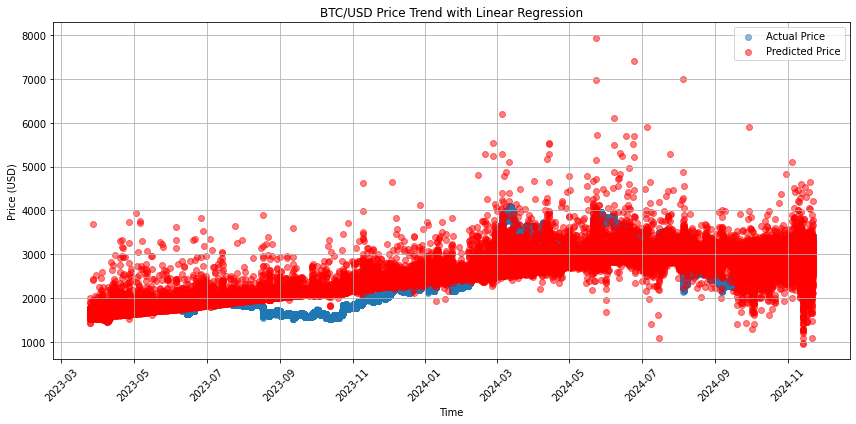

In [27]:
# Linear regression
# Define the features and target variable
X = dataset[['Time', 'Quote asset volume', 'Number of trades']]
y = dataset['Close']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict the closing prices on the validation set
predicted_prices = model.predict(X_val)

# Calculate prediction accuracy
mse = mean_squared_error(y_val, predicted_prices)
r2 = r2_score(y_val, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(dataset['Open time'], y, label='Actual Price', alpha=0.5)
plt.scatter(dataset.loc[X_val.index, 'Open time'], predicted_prices, label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients: [ 0.00000000e+00  1.72073554e-14 -4.23762714e-15 -4.18466525e-19
  1.01540801e-14  1.41662602e-13 -1.09973437e-10 -8.91399082e-12
  8.92534540e-09  1.21130922e-11]
Intercept: -27097.739135508837
Mean Squared Error: 205053.09988669067
R-squared: 0.5485551001795861


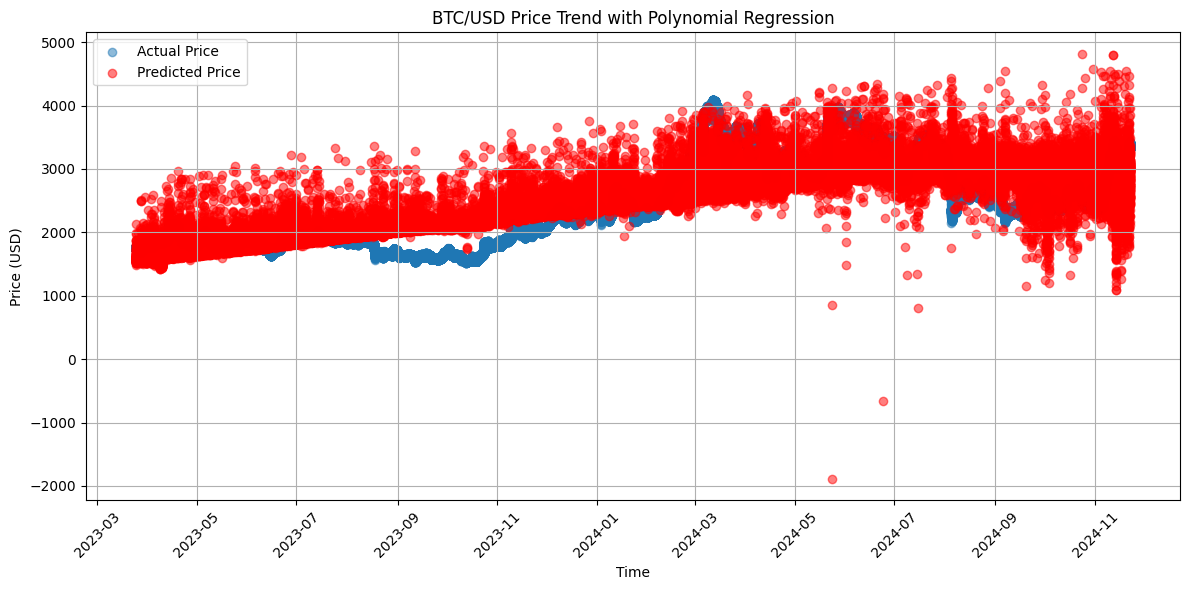

In [13]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Define the features and target variable
X = dataset[['Time', 'Quote asset volume', 'Number of trades']]
y = dataset['Close']

# Transform the features to polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict the closing prices on the validation set
predicted_prices = model.predict(X_val)

# Calculate prediction accuracy
mse = mean_squared_error(y_val, predicted_prices)
r2 = r2_score(y_val, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(dataset['Open time'], y, label='Actual Price', alpha=0.5)
plt.scatter(dataset.loc[y_val.index, 'Open time'], predicted_prices, label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients: [-9.01870473e-45 -1.34612639e-43  3.33738277e-45 -1.58411369e-46
 -1.07816040e-47 -4.26969986e-48  5.21189118e-50  1.28292706e-49
  2.13821177e-50  1.06910588e-50  6.86633254e-47 -5.35432031e-48
 -1.97479849e-51 -3.17444501e-50 -2.29664947e-53  4.53370144e-55
 -6.28890320e-55 -3.90788759e-53 -4.67135641e-56 -3.77231248e-59
  7.82546444e-38 -4.58326172e-39 -1.69088550e-42 -2.72241291e-41
 -1.86336412e-44  8.02804617e-46 -2.25477094e-45 -6.71094817e-44
 -8.01629611e-47 -6.46008652e-50 -6.42035266e-45 -2.74786256e-45
 -3.60823157e-48 -3.59868910e-51 -3.15487113e-54  8.10373219e-43
  5.43983253e-41 -2.61706816e-38 -1.16307051e-38  3.97756180e-36
  1.42071761e-36  7.30685528e-37 -1.15239726e-34 -1.37557696e-37
 -1.10621079e-40 -1.72550620e-35 -4.72333445e-36 -6.19954749e-39
 -6.18160461e-42 -5.41682569e-45  1.46822154e-34 -7.72610724e-38
 -1.70501128e-40 -1.99117136e-43 -1.96189399e-46 -1.78003348e-49]
Intercept: -9326.220823547515
Mean Squared Error: 195357.35499629364
R-squa

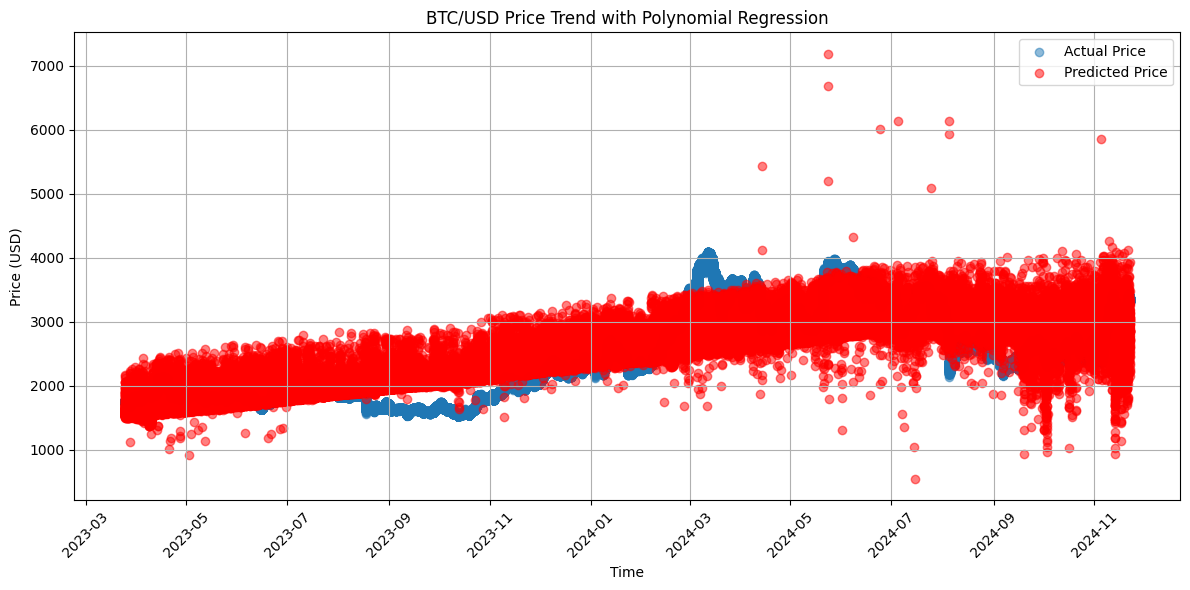

In [14]:
degree = 5  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict the closing prices on the validation set
predicted_prices = model.predict(X_val)

# Calculate prediction accuracy
mse = mean_squared_error(y_val, predicted_prices)
r2 = r2_score(y_val, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(dataset['Open time'], y, label='Actual Price', alpha=0.5)
plt.scatter(dataset.loc[y_val.index, 'Open time'], predicted_prices, label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients: [ 6.82023166e-51 -1.55381034e-49  5.52753381e-54 -2.47082899e-53
 -3.20528259e-54  1.75124541e-54  1.26309455e-55  1.81500753e-56
 -2.92645017e-58  1.26657433e-58  2.12550272e-59 -2.23260976e-60
 -6.26432990e-61 -3.15530120e-60  1.94317298e-61  1.69894698e-61
 -2.00546391e-62 -3.64629801e-63 -1.85353482e-62 -4.86173069e-63
  0.00000000e+00  0.00000000e+00  7.97772522e-68  2.06694683e-65
  1.46266695e-68  1.08165664e-71  4.28530438e-67  2.92571445e-70
  2.11428490e-73  1.80992727e-76  8.87446037e-69  5.87512223e-72
  6.38097918e-75  7.49723344e-78  9.34778205e-81  9.41842309e-57
 -1.00547730e-57  9.01152467e-59  2.35030318e-56  1.66322411e-59
  1.23012610e-62  4.87498259e-58  3.32801055e-61  2.40474600e-64
  2.17397264e-67  1.01031892e-59  6.68697121e-63  8.58530106e-66
  1.11362251e-68  1.47181433e-71  2.30320939e-61  1.47376433e-64
  2.41104593e-67  3.68100067e-70  4.93443821e-73  6.37249311e-76
  1.52909667e-50 -2.89287428e-49  7.63434684e-50  2.00447518e-47
  1.4185319

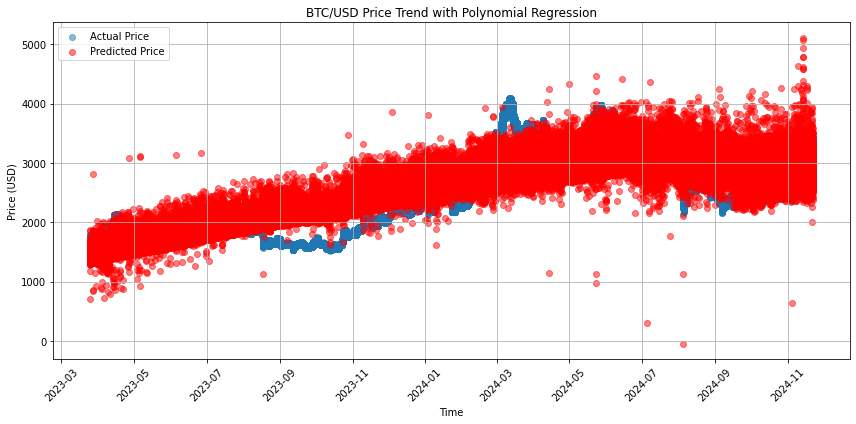

In [33]:
degree = 7  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict the closing prices on the validation set
predicted_prices = model.predict(X_val)

# Calculate prediction accuracy
mse = mean_squared_error(y_val, predicted_prices)
r2 = r2_score(y_val, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(dataset['Open time'], y, label='Actual Price', alpha=0.5)
plt.scatter(dataset.loc[y_val.index, 'Open time'], predicted_prices, label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using device: cuda
Epoch [10/100], Loss: 0.0173
Epoch [20/100], Loss: 0.0103
Epoch [30/100], Loss: 0.0065
Epoch [40/100], Loss: 0.0052
Epoch [50/100], Loss: 0.0093
Epoch [60/100], Loss: 0.0121
Epoch [70/100], Loss: 0.0058
Epoch [80/100], Loss: 0.0218
Epoch [90/100], Loss: 0.0144
Epoch [100/100], Loss: 0.0039
Mean Squared Error: 2268.436279296875
R-squared: 0.9950057864189148


AttributeError: 'Tensor' object has no attribute 'index'

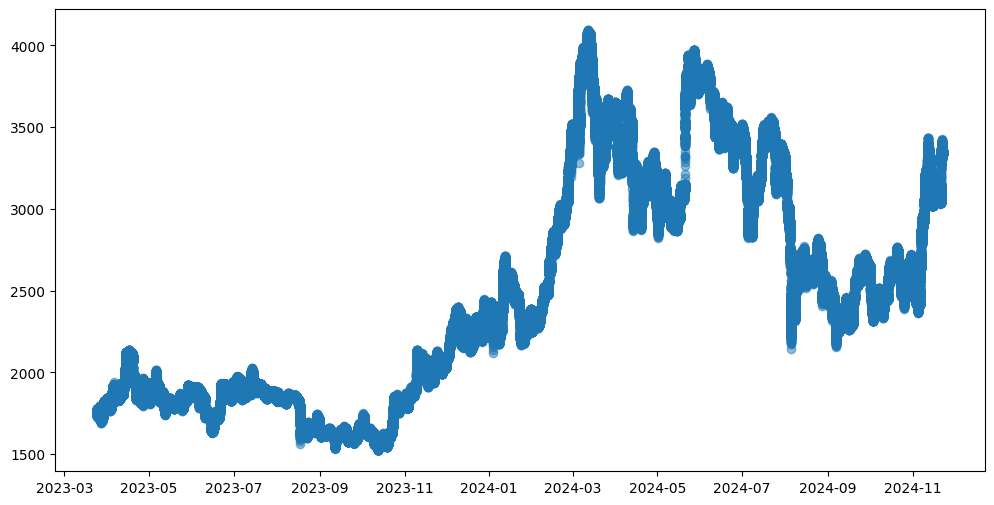

In [3]:
# support vector regression
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define a simple neural network that mimics SVR behavior
class SVRNet(nn.Module):
    def __init__(self, input_dim):
        super(SVRNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Prepare the data
X = dataset[['Time', 'Quote asset volume', 'Number of trades']].values
y = dataset['Close'].values

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors and move to GPU
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
X_val = torch.FloatTensor(X_val).to(device)
y_val = torch.FloatTensor(y_val).to(device)

# Initialize the model
model = SVRNet(input_dim=3).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 100
batch_size = 64

for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    predicted_scaled = model(X_val).cpu().numpy().ravel()
    
# Inverse transform the predictions
predicted_prices = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()
y_val_orig = scaler_y.inverse_transform(y_val.cpu().numpy().reshape(-1, 1)).ravel()

# Calculate metrics
mse = mean_squared_error(y_val_orig, predicted_prices)
r2 = r2_score(y_val_orig, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(dataset['Open time'], dataset['Close'], label='Actual Price', alpha=0.5)
plt.scatter(dataset.loc[y_val.index, 'Open time'], predicted_prices, 
           label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with PyTorch Neural Network')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

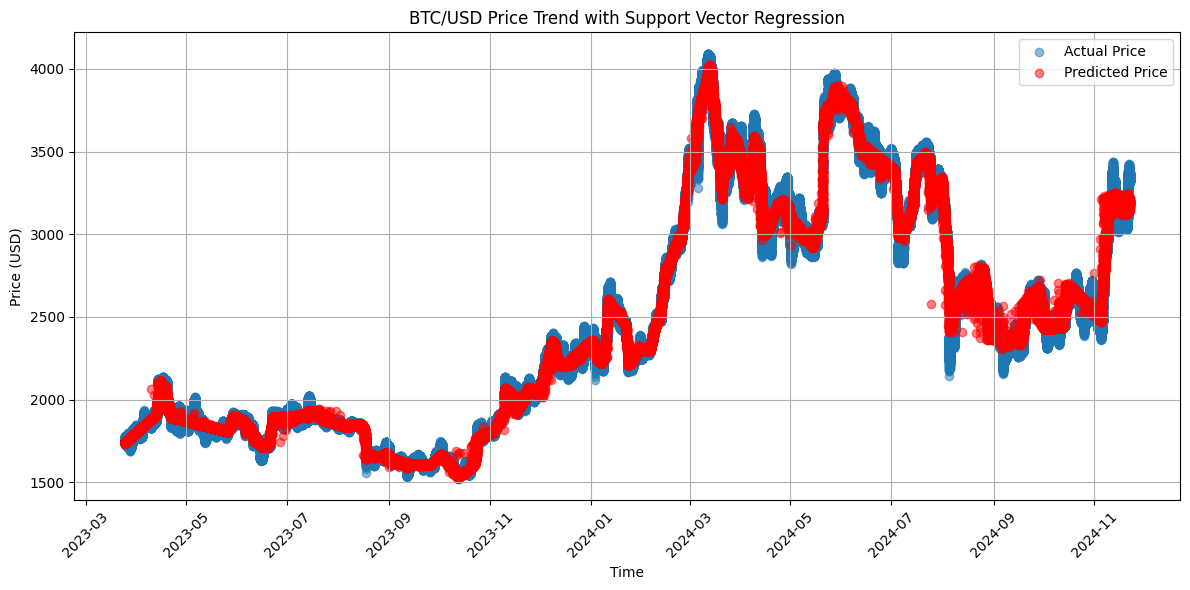

In [9]:
# Plot the results - corrected version
plt.figure(figsize=(12, 6))

plt.scatter(dataset['Open time'], dataset['Close'], label='Actual Price', alpha=0.5)

_, _, _, _, train_idx, val_idx = train_test_split(X, y, np.arange(len(X)), 
                                                 test_size=0.2, random_state=42)
plt.scatter(dataset['Open time'].iloc[val_idx], predicted_prices, 
           label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with Support Vector Regression')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import numpy as np

# Check if CUDA is available
device = torch.device('cuda')
print(f"Using device: {device}")

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True,
        dropout= dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take only the last time step output
        return out

# Create sequence dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, sequence_length=10):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.X) - self.sequence_length
        
    def __getitem__(self, idx):
        return (self.X[idx:idx+self.sequence_length], 
                self.y[idx+self.sequence_length])

# Prepare data
X = dataset[['Time','Quote asset volume', 'Number of trades']].values
y = dataset['Close'].values

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Create sequences
sequence_length = 10
train_size = int(len(X_scaled) * 0.8)

# Split into train and validation sets
X_train = X_scaled[:train_size]
X_val = X_scaled[train_size:]
y_train = y_scaled[:train_size]
y_val = y_scaled[train_size:]

# Create datasets
train_dataset = TimeSeriesDataset(X_train, y_train, sequence_length)
val_dataset = TimeSeriesDataset(X_val, y_val, sequence_length)

# Create dataloaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize model
input_dim = 3  # number of features
hidden_dim = 16
num_layers = 2
output_dim = 1
dropout = 0.2

model = GRUModel(input_dim, hidden_dim, num_layers, output_dim, dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop
n_epochs = 100
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        # Add gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss += loss.item()
    # Step the scheduler
    scheduler.step(train_loss)
    # Validation
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch.unsqueeze(1)).item()
            predictions.extend(y_pred.cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())
    
    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Make predictions on validation set
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        y_pred = model(X_batch)
        predictions.extend(y_pred.cpu().numpy())
        actuals.extend(y_batch.numpy())

# Convert predictions back to original scale
predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).ravel()
actuals = scaler_y.inverse_transform(np.array(actuals).reshape(-1, 1)).ravel()

# Calculate metrics
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Using device: cuda
Epoch [5/100], Train Loss: 0.1279, Val Loss: 1.6763
Epoch [10/100], Train Loss: 0.1247, Val Loss: 1.6250
Epoch [15/100], Train Loss: 0.1281, Val Loss: 1.6187
Epoch [20/100], Train Loss: 0.1176, Val Loss: 1.7322
Epoch [25/100], Train Loss: 0.1135, Val Loss: 1.5956
Epoch [30/100], Train Loss: 0.1133, Val Loss: 1.5702
Epoch [35/100], Train Loss: 0.1108, Val Loss: 1.5022
Epoch [40/100], Train Loss: 0.1101, Val Loss: 1.5367
Epoch [45/100], Train Loss: 0.1103, Val Loss: 1.5247
Epoch [50/100], Train Loss: 0.1051, Val Loss: 1.4849
Epoch [55/100], Train Loss: 0.1049, Val Loss: 1.3241
Epoch [60/100], Train Loss: 0.1028, Val Loss: 1.2444


KeyboardInterrupt: 

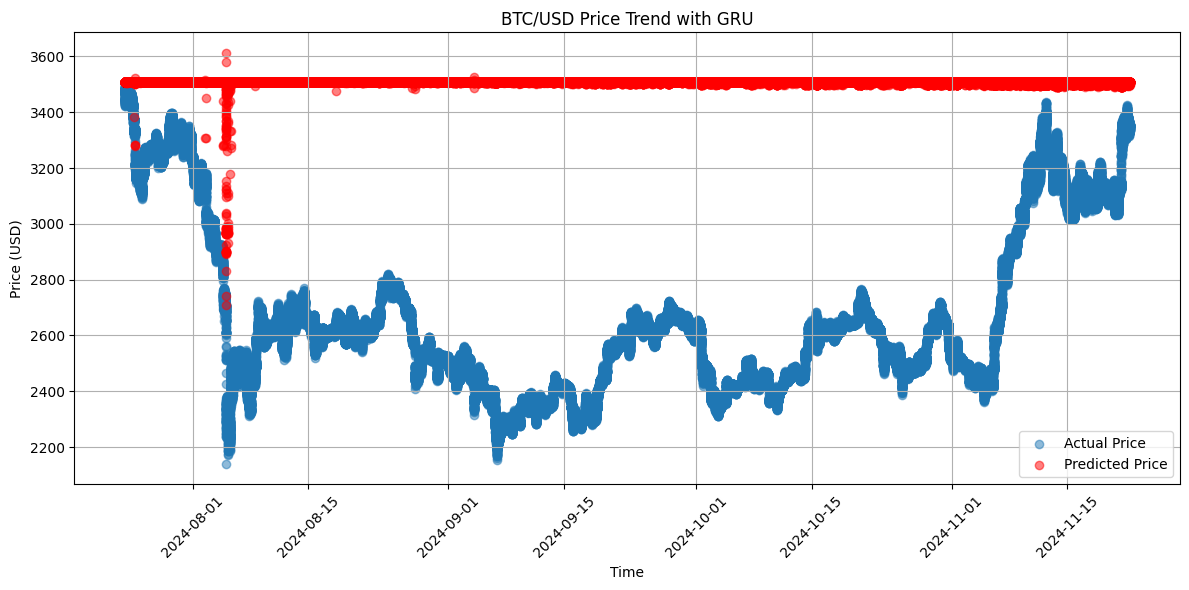

In [20]:
# Plot results
plt.figure(figsize=(12, 6))
val_indices = range(train_size + sequence_length, len(dataset))
plt.scatter(dataset['Open time'].iloc[val_indices][:len(predictions)], 
           actuals, 
           label='Actual Price', 
           alpha=0.5)

plt.scatter(dataset['Open time'].iloc[val_indices][:len(predictions)], 
           predictions, label='Predicted Price', color='red', alpha=0.5)
plt.title('BTC/USD Price Trend with GRU')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()